In [ ]:
#| default_exp regression

In [ ]:
#| hide
from nbdev.showdoc import *
import nbdev
from nbdev import nbdev_export

In [ ]:
#| export
from ITS_LIVE_Analysis import datacube_tools, setup

In [ ]:
#| export
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, ExpSineSquared, RationalQuadratic, RBF
from sklearn.model_selection import GridSearchCV
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
#from sklearn.pipeline import Pipeline

In [ ]:
data_gen_path = '/uufs/chpc.utah.edu/common/home/cryosphere/emarshall/'
centerline_dir = 'oggm_flowlines/'
centerline_14_path = os.path.join(data_gen_path, centerline_dir, 'rgi_14/centerlines_smoothed_14.shp')
#working dir path for oggm 
wd_path = '/uufs/chpc.utah.edu/common/home/u1269862/2023_fall/oggm_scratch'
l12_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/centerlines/'
#ind glacier inputs 
rgi_id = 'RGI60-14.06794'
mid_point = [76.3797, 35.7376]
lower_point = [76.2402, 35.7347]
upper_point = [76.5396, 35.7215]
label = 'mid-glacier'

In [ ]:
baltoro = setup.Glacier('baltoro', rgi_id, wd_path, l12_url, centerline_14_path, 'EPSG:32643')

2023-10-19 12:32:28: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2023-10-19 12:32:28: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2023-10-19 12:32:28: oggm.cfg: Multiprocessing: using slurm allocated processors (N=4)
2023-10-19 12:32:29: oggm.cfg: Multiprocessing switched ON after user settings.
2023-10-19 12:32:30: oggm.workflow: init_glacier_directories from prepro level 2 on 1 glaciers.
2023-10-19 12:32:30: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2023-10-19 12:32:33: oggm.workflow: Execute entity tasks [glacier_masks] on 1 glaciers
2023-10-19 12:32:37: oggm.workflow: Execute entity tasks [velocity_to_gdir] on 1 glaciers
2023-10-19 12:32:39: oggm.workflow: Execute entity tasks [add_consensus_thickness] on 1 glaciers


In [ ]:
var_ls = ['v','vy','vx','v_error','mapping','satellite_img1','satellite_img2','acquisition_date_img1', 'acquisition_date_img2']

In [ ]:
baltoro_mid_point = setup.Point('Baltoro','baltoro_mid_point', 'RGI60-14.06794', baltoro, mid_point, 'EPSG:32643', var_ls)

original xy [76.3797, 35.7376] 4326 maps to datacube (624763.5766152533, 3955722.574253059) EPSG:32643
original xy [76.3797, 35.7376] 4326 maps to datacube (624763.5766152533, 3955722.574253059) EPSG:32643
subset and load at  28.42 seconds


In [ ]:
baltoro_lower_point = setup.Point('Baltoro','baltoro_lower_point', 'RGI60-14.06794', baltoro, lower_point, 'EPSG:32643', var_ls)

original xy [76.2402, 35.7347] 4326 maps to datacube (612152.2641792747, 3955232.420778669) EPSG:32643
original xy [76.2402, 35.7347] 4326 maps to datacube (612152.2641792747, 3955232.420778669) EPSG:32643
subset and load at  27.84 seconds


In [ ]:
baltoro_upper_point = setup.Point('Baltoro','baltoro_upper_point', 'RGI60-14.06794', baltoro, upper_point, 'EPSG:32643', var_ls)

original xy [76.5396, 35.7215] 4326 maps to datacube (639252.1086175955, 3954151.937661278) EPSG:32643
original xy [76.5396, 35.7215] 4326 maps to datacube (639252.1086175955, 3954151.937661278) EPSG:32643
subset and load at  27.17 seconds


In [ ]:
matern_kernel = 1**2* Matern(length_scale=1, nu=1, length_scale_bounds = (1e-6,2e2)) + WhiteKernel(noise_level=1, noise_level_bounds = (1e-6,1e3))

In [ ]:
run_vis_GP_model(df0, 'GP regression on obs where temporal baseline ranges from 60-120 days', matern_kernel, 'old')

NameError: name 'run_vis_GP_model' is not defined

2094
1.19**2 * Matern(length_scale=0.213, nu=1) + WhiteKernel(noise_level=0.0999)
log marginal likelihood:  -741.2905564081423
{'k1': 1.19**2 * Matern(length_scale=0.213, nu=1), 'k2': WhiteKernel(noise_level=0.0999), 'k1__k1': 1.19**2, 'k1__k2': Matern(length_scale=0.213, nu=1), 'k1__k1__constant_value': 1.4089976778778615, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__length_scale': 0.21333823007797284, 'k1__k2__length_scale_bounds': (1e-06, 200.0), 'k1__k2__nu': 1, 'k2__noise_level': 0.09988247466901402, 'k2__noise_level_bounds': (1e-06, 1000.0)}
(2094, 1)
(2094,)
sigma:  (2094,)
RMSE:  47.88172974589709


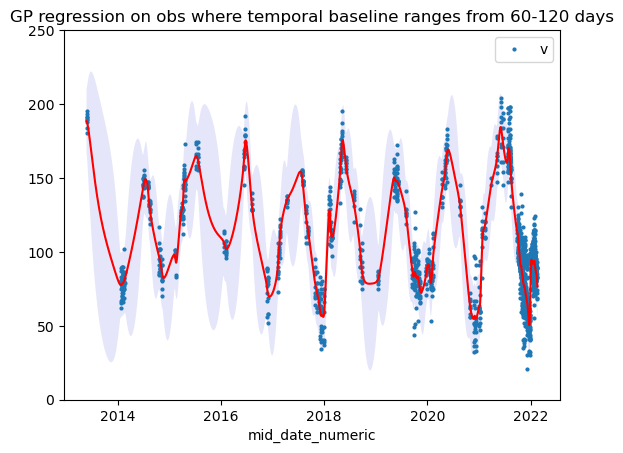

In [ ]:
run_vis_GP_model(df1, 'GP regression on obs where temporal baseline ranges from 60-120 days', matern_kernel, 'old')

In [ ]:
baltoro_mid_point.rgi_id

'RGI60-14.06794'

In [ ]:
cutoffs = [60, 120, 180, 360]
matern_kernel = 1**2* Matern(length_scale=1, nu=3/2, length_scale_bounds = (1e-2,2e2)) + WhiteKernel(noise_level=1, noise_level_bounds = (1e-6,1e3))

In [ ]:
baltoro_mid_point_df = Point_df(baltoro_mid_point,  cutoffs)

In [ ]:
baltoro_lower_point_df = Point_df(baltoro_lower_point, cutoffs)

In [ ]:
baltoro_upper_point_df = Point_df(baltoro_upper_point, cutoffs)

In [ ]:
baltoro_mid_point_gp = baltoro_mid_point_df.run_GP_model('short', matern_kernel, 'old')

here
(1183, 13)
about to run gp fn
1.01**2 * Matern(length_scale=0.203, nu=1.5) + WhiteKernel(noise_level=0.112)
log marginal likelihood:  -472.99829422762855
{'k1': 1.01**2 * Matern(length_scale=0.203, nu=1.5), 'k2': WhiteKernel(noise_level=0.112), 'k1__k1': 1.01**2, 'k1__k2': Matern(length_scale=0.203, nu=1.5), 'k1__k1__constant_value': 1.0283323661083201, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__length_scale': 0.20251101194964227, 'k1__k2__length_scale_bounds': (0.01, 200.0), 'k1__k2__nu': 1.5, 'k2__noise_level': 0.11226646373382211, 'k2__noise_level_bounds': (1e-06, 1000.0)}
(1183, 1)
(1183,)
sigma:  (1183,)
RMSE:  50.92765465135032


In [ ]:
baltoro_upper_point_gp = baltoro_upper_point_df.run_GP_model('short', matern_kernel, 'old')

here
(2132, 13)
about to run gp fn
1.15**2 * Matern(length_scale=0.0182, nu=1.5) + WhiteKernel(noise_level=0.182)
log marginal likelihood:  -1492.5812655188324
{'k1': 1.15**2 * Matern(length_scale=0.0182, nu=1.5), 'k2': WhiteKernel(noise_level=0.182), 'k1__k1': 1.15**2, 'k1__k2': Matern(length_scale=0.0182, nu=1.5), 'k1__k1__constant_value': 1.3120951354075927, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__length_scale': 0.018194971198277017, 'k1__k2__length_scale_bounds': (0.01, 200.0), 'k1__k2__nu': 1.5, 'k2__noise_level': 0.18224556684245585, 'k2__noise_level_bounds': (1e-06, 1000.0)}
(2132, 1)
(2132,)
sigma:  (2132,)
RMSE:  34.61006958123753


In [ ]:
#baltoro_lower_point_gp_short = baltoro_lower_point_df.run_GP_model('short', matern_kernel, 'new')
# this lower point has a slower med velocity, temp baseline cutoff is 145 days so no 'short' df

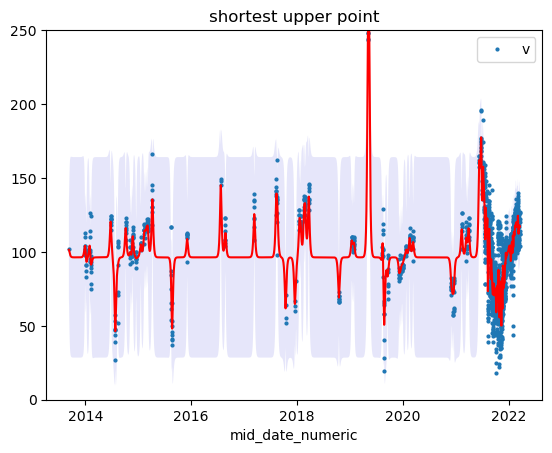

In [ ]:
vis_GP(baltoro_upper_point_gp[0], baltoro_upper_point_gp[1], baltoro_upper_point_gp[2], baltoro_upper_point_gp[3], 'shortest upper point')

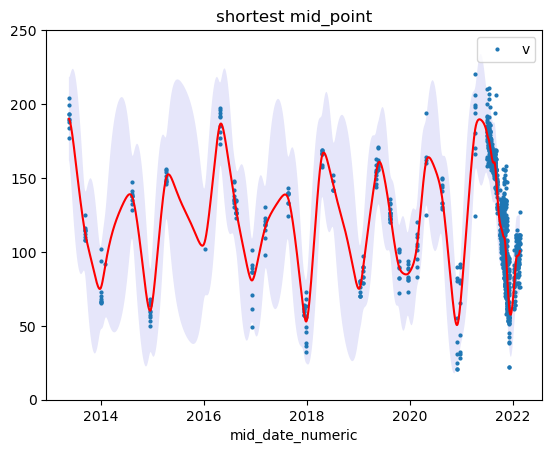

In [ ]:
vis_GP(baltoro_mid_point_gp[0], baltoro_mid_point_gp[1], baltoro_mid_point_gp[2], baltoro_mid_point_gp[3], 'shortest mid_point')

## trying spatiotemporal gp

Combine shortest temporal baseline dfs of 2 points (upper and mid point baltoro)

In [ ]:
upper_mid_point_shortest_tb_v_df = pd.concat([baltoro_mid_point_df.shortest_temp_baseline_df, baltoro_upper_point_df.shortest_temp_baseline_df])

In [ ]:
upper_mid_point_shortest_tb_v_df.head()

,y,x,acquisition_date_img1,acquisition_date_img2,v,vx,vy,step_count,mapping,date_dt,mid_date_numeric,date1_numeric,date2_numeric
mid_date,,,,,,,,,,,,,
2013-05-18 05:30:10.536076032,3955867.5,624652.5,2013-03-22 05:29:09,2013-07-14 05:31:12,189.0,-188.0,20.0,12218,0,115,2013.378082,2013.221918,2013.534247
2013-05-18 05:30:10.536076032,3955867.5,624772.5,2013-03-22 05:29:09,2013-07-14 05:31:12,184.0,-182.0,26.0,12218,0,115,2013.378082,2013.221918,2013.534247
2013-05-18 05:30:10.536076032,3955867.5,624892.5,2013-03-22 05:29:09,2013-07-14 05:31:12,177.0,-176.0,23.0,12218,0,115,2013.378082,2013.221918,2013.534247
2013-05-18 05:30:10.536076032,3955747.5,624652.5,2013-03-22 05:29:09,2013-07-14 05:31:12,193.0,-193.0,8.0,12218,0,115,2013.378082,2013.221918,2013.534247
2013-05-18 05:30:10.536076032,3955747.5,624772.5,2013-03-22 05:29:09,2013-07-14 05:31:12,190.0,-190.0,7.0,12218,0,115,2013.378082,2013.221918,2013.534247


In [ ]:
# Example data (replace with your own dataset)
X = upper_mid_point_shortest_tb_v_df[['x','y','mid_date_numeric']]  # 100 samples, 3 dimensions
y = upper_mid_point_shortest_tb_v_df['v']  # Your target function

In [ ]:
# Define the kernel (RBF kernel with length-scale and constant term)
kernel = 1**2* RBF(1.0, (1e-2, 1e2))

In [ ]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

In [ ]:
gp.fit(X,y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [ ]:
X_pred = np.linspace(df.mid_date_numeric.min(), df.mid_date_numeric.max(), num = len(X)).reshape(-1,1)

In [ ]:
x_d0 = np.linspace(X.mid_date_numeric.min(), X.mid_date_numeric.max(), num=len(X)).reshape(-1,1)
x_d1 = np.linspace(X.x.min(), X.x.max(), num=len(X)).reshape(-1,1)
x_d2 = np.linspace(X.y.min(), X.y.max(), num=len(X)).reshape(-1,1)
#a = np.linspace(X.mid_date_numeric.min(), X.mid_date_numeric.max(), num = len(X)).reshape(-1,1)
#a.shape
grid_dim1, grid_dim2, grid_dim3 = np.meshgrid(x_d0, x_d1, x_d2, indexing='ij')

In [ ]:
baltoro_mid_point_gp

In [ ]:
baltoro_mid_point_gp.vis_GP()

AttributeError: 'function' object has no attribute 'vis_GP'

In [ ]:
from functools import partial
from sklearn.gaussian_process import GaussianProcessRegressor
import scipy.optimize


class MynewGPR(GaussianProcessRegressor):
    max_iter = 10
    def __init__(self, kernel = None, alpha=1e-10, optimizer = 'fmin_l_bfgs_b', n_restarts_optimizer=5, normalize_y=True, copy_X_train=True, random_state=None):
        super().__init__(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=5, normalize_y=True, copy_X_train=True, random_state=None)
        #self._max_iter = max_iter

    def _constrained_optimization(self, obj_func, initial_theta, bounds):
        def new_optimizer(obj_func, initial_theta, bounds):
            return scipy.optimize.minimize(
                obj_func,
                initial_theta,
                method="L-BFGS-B",
                jac=True,
                bounds=bounds,
                max_iter=self._max_iter,
            )
        self.optimizer = new_optimizer
        return super()._constrained_optimization(obj_func, initial_theta, bounds)
        #return self
mynewgpr = MynewGPR()

def setup_GP_model(df, kernel, gpr):
    #df = self.long_temp_baseline_df
    pd.options.mode.chained_assignment = None  # default='warn'
                    
    X = df['mid_date_numeric'].values
    df['mid_date_numeric'] = df.index.year + df.index.day_of_year / 365
        
        
    X = df['mid_date_numeric'].values
    X = X.reshape(-1,1)
    y = df['v']
    parameters = {'kernel':('matern', 'rbf'), 'L':[1, 10]}
        
    if gpr == 'new':
        print('in new gpr')
        gp = MynewGPR(kernel=kernel, normalize_y=True, n_restarts_optimizer=10 ,optimizer='fmin_l_bfgs_b')
        gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=10 ,optimizer='fmin_l_bfgs_b')
            
        gp.fit(X,y)
        print(gp.kernel_)    
        print('log marginal likelihood: ', gp.log_marginal_likelihood(gp.kernel_.theta))
            
        params = gp.kernel_.get_params()
        print(params)
                
        X_pred = np.linspace(df.mid_date_numeric.min(), df.mid_date_numeric.max(), num = len(X)).reshape(-1,1)
        print(X_pred.shape)
        y_pred, sigma = gp.predict(X_pred, return_std=True)
        print(y_pred.shape)
        print('sigma: ', sigma.shape)
        rmse = np.sqrt(((y_pred - y)**2).mean())
        print('RMSE: ', rmse)

        return (df, X_pred, y_pred, sigma)
        
    elif gpr == 'old':
        gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=10 ,optimizer='fmin_l_bfgs_b')
            
        gp.fit(X,y)
        print(gp.kernel_)    
        print('log marginal likelihood: ', gp.log_marginal_likelihood(gp.kernel_.theta))
            
        params = gp.kernel_.get_params()
        print(params)
                
        X_pred = np.linspace(df.mid_date_numeric.min(), df.mid_date_numeric.max(), num = len(X)).reshape(-1,1)
        print(X_pred.shape)
        y_pred, sigma = gp.predict(X_pred, return_std=True)
        print(y_pred.shape)
        print('sigma: ', sigma.shape)
        rmse = np.sqrt(((y_pred - y)**2).mean())
        print('RMSE: ', rmse)
        
        return (df, X_pred, y_pred, sigma)
    

class Point_df():
    def __init__(self, point_obj, cutoffs):
        self.name = point_obj.name
        self.rgi_id = point_obj.rgi_id
        self.point_obj = point_obj
        self.v_df = self._ds2df()
        self.temp_baseline_df = self._select_point_filter_baselines(cutoffs[0], cutoffs[1], cutoffs[2], cutoffs[3])
        self.shortest_temp_baseline_df = self.temp_baseline_df[1]
        self.mid_temp_baseline_df = self.temp_baseline_df[2]
        self.mid_long_temp_baseline_df = self.temp_baseline_df[3]
        self.long_temp_baseline_df = self.temp_baseline_df[4]
        

    def _ds2df(self):
    
        df = self.point_obj.TRIM_cube_around_point[['acquisition_date_img1','acquisition_date_img2','v','vx','vy']].to_dataframe().reset_index()
        df = df.dropna()
        df['mid_date'] = pd.to_datetime(df['mid_date'])
        df = df.sort_values(by='mid_date')
        df['date_dt'] = -1*(df['acquisition_date_img1'] - df['acquisition_date_img2']).dt.days
    
        #df['point_label'] = 'new_glacier_mid_point'
        df = df.set_index('mid_date')
        df['mid_date_numeric'] = df.index.year + df.index.day_of_year / 365
        df['date1_numeric'] = df.acquisition_date_img1.dt.year + df.acquisition_date_img1.dt.day_of_year/365
    
        df['date2_numeric'] = df.acquisition_date_img2.dt.year + df.acquisition_date_img2.dt.day_of_year/365
    
        return df

    def _select_point_filter_baselines(self, cutoff1, cutoff2, cutoff3, cutoff4):

        df_pt = self.v_df
    
        df_short = df_pt.loc[(df_pt['date_dt'] >= cutoffs[0]) & (df_pt['date_dt'] < cutoffs[1])]
        df_med = df_pt.loc[(df_pt['date_dt'] >= cutoffs[1]) & (df_pt['date_dt'] < cutoffs[2])]
        df_long = df_pt.loc[(df_pt['date_dt'] >= cutoffs[2]) & (df_pt['date_dt'] < cutoffs[3])]
        df_extralong = df_pt.loc[df_pt['date_dt'] > cutoffs[3]]
    
        return (df_pt, df_short, df_med, df_long, df_extralong)

    def run_GP_model(self, temp_baseline, kernel, gpr):

        if temp_baseline == 'short':
            print('here')
            
            df = self.shortest_temp_baseline_df
            print(df.shape)
            print('about to run gp fn')
            m = setup_GP_model(df, kernel, gpr)
            
            
            return m
            #m = setup_GP_model(df, kernel, gpr)

        elif temp_baseline == 'mid':
            df = self.mid_temp_baseline_df
        elif temp_baseline == 'mid_long':
            df = self.mid_long_temp_baseline_df
        else:
            df = self.long_temp_baseline_df

            


def vis_GP(df, X_pred, y_pred, sigma, label):

    fig, ax = plt.subplots()
    label = label
    df.plot(x='mid_date_numeric', y='v', ax=ax, linestyle='None', marker='o', markersize=2)
    ax.plot(X_pred, y_pred, 'r')
    ax.fill_between(X_pred.ravel(),
            y_pred + 1.96 * sigma,
            y_pred - 1.96 * sigma,
            facecolor='lavender')
    ax.set_ylim(0,250)
    ax.set_title(label)
            
            